In [1]:
# Imports
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [63]:
# Number of optimizations/versions
num_o = 10

# Create dataframe for all data
data_all = pd.DataFrame()

# Loop over all versions
for version in range(0, num_o):
    
    # Parse data
    directory = "datastructure_o{}".format(version)
    path = "./{}/bench/stats.csv".format(directory)
    data = pd.read_csv(path, skipinitialspace = True)
    
    # Add version column
    data["version"] = version
    
    # Select columns
    data = data.loc[:, ["version", "event", "occurrences"]]
    
    # Add current data to all data
    data_all = pd.concat([data_all, data], ignore_index = True)
    
print(data_all[data_all.event == "cycles"])

     version   event  occurrences
0          0  cycles  56108295910
6          0  cycles  54919569727
12         1  cycles  54163526509
18         1  cycles  53706982758
24         2  cycles  53698469938
30         2  cycles  53889337801
36         3  cycles  55068381999
42         3  cycles  54379389999
48         4  cycles  58388769975
54         4  cycles  54478566368
60         5  cycles  53976463517
66         5  cycles  54003808023
72         6  cycles  54718381831
78         6  cycles  54067850099
84         7  cycles  48258631866
90         7  cycles  48254678694
96         7  cycles  48307378114
102        8  cycles  48265362422
108        8  cycles  48408495481
114        9  cycles  49106071246
120        9  cycles  48948127991


[Text(0.5, 1.0, 'Cycles'), Text(0.5, 0, 'Versions'), Text(0, 0.5, 'Cycles')]

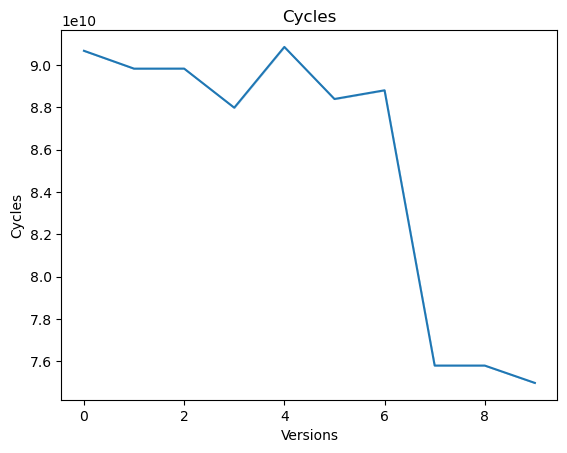

In [67]:
g = sns.lineplot(
    x = "version",
    y = "occurrences",
    data=data_all[data_all.event == "instructions"])

g.set(
    title="Cycles",
    xlabel="Versions",
    ylabel="Cycles")